In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cell 2: Load the data
print("Loading data...")
data_path = "../data/raw/ethiopia_fi_unified_data.csv"
ref_path = "../data/raw/reference_codes.csv"

# Read CSV files
df = pd.read_csv(data_path)
ref_codes = pd.read_csv(ref_path)

print(f"Main data shape: {df.shape}")
print(f"Reference codes shape: {ref_codes.shape}")

# Cell 3: Show first few rows
print("\nFirst 5 rows of main data:")
print(df.head())

print("\nFirst 5 rows of reference codes:")
print(ref_codes.head())

# Cell 4: Explore record types
print("\n=== Record Type Distribution ===")
record_counts = df['record_type'].value_counts()
print(record_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
record_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Record Types')
plt.xlabel('Record Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cell 5: Separate data by record type
observations = df[df['record_type'] == 'observation']
events = df[df['record_type'] == 'event']
impact_links = df[df['record_type'] == 'impact_link']
targets = df[df['record_type'] == 'target']

print(f"\nObservations: {len(observations)} records")
print(f"Events: {len(events)} records")
print(f"Impact Links: {len(impact_links)} records")
print(f"Targets: {len(targets)} records")

# Cell 6: Explore observations
print("\n=== OBSERVATIONS ===")
print(f"Total observations: {len(observations)}")

# Check pillars in observations
if 'pillar' in observations.columns:
    pillar_counts = observations['pillar'].value_counts()
    print("\nObservations by Pillar:")
    print(pillar_counts)
    
    # Plot
    plt.figure(figsize=(8, 5))
    pillar_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Observations by Pillar')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# Cell 7: Show unique indicators
if 'indicator' in observations.columns:
    print("\nUnique Indicators in Observations:")
    for idx, indicator in enumerate(observations['indicator'].unique()):
        print(f"{idx+1}. {indicator}")

# Cell 8: Explore events
print("\n=== EVENTS ===")
if 'category' in events.columns:
    print("Event Categories:")
    print(events['category'].value_counts())
    
    # Plot events
    plt.figure(figsize=(10, 6))
    events['category'].value_counts().plot(kind='bar', color='orange')
    plt.title('Event Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Cell 9: Check dates
print("\n=== DATE RANGES ===")
# Convert date columns
date_cols = [col for col in df.columns if 'date' in col.lower()]
print(f"Date columns: {date_cols}")

# Convert observation_date to datetime
if 'observation_date' in df.columns:
    df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')
    
    # Check range for observations
    obs_dates = observations['observation_date'].dropna()
    if not obs_dates.empty:
        print(f"Observation date range: {obs_dates.min()} to {obs_dates.max()}")
        
        # Plot timeline of observations
        plt.figure(figsize=(12, 6))
        year_counts = obs_dates.dt.year.value_counts().sort_index()
        year_counts.plot(kind='bar', color='green')
        plt.title('Observations by Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Observations')
        plt.tight_layout()
        plt.show()

# Cell 10: Check for missing values
print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Cell 11: Save processed data
print("\n=== SAVING PROCESSED DATA ===")
# Save each record type separately
observations.to_csv('../data/processed/observations.csv', index=False)
events.to_csv('../data/processed/events.csv', index=False)
impact_links.to_csv('../data/processed/impact_links.csv', index=False)
targets.to_csv('../data/processed/targets.csv', index=False)

print("Data saved to ../data/processed/")

Loading data...
Main data shape: (13, 1)
Reference codes shape: (10, 1)

First 5 rows of main data:
  record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value 
0  observation,access,Account Ownership,ACC_OWNER...                                                                                                                                                                                     
1  observation,access,Account Ownership,ACC_OWNER...                                                                                                                                                                                     
2  observation,access,Account Ownership,ACC_OWNER...                                                                                                                                                  

KeyError: 'record_type'

In [2]:
# Let's see the raw data first
with open('../data/raw/ethiopia_fi_unified_data.csv', 'r') as f:
    first_lines = [next(f) for _ in range(5)]
    
print("First 5 lines of raw file:")
for i, line in enumerate(first_lines):
    print(f"Line {i}: {line}")

First 5 lines of raw file:
Line 0: "record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value" 

Line 1: "observation,access,Account Ownership,ACC_OWNERSHIP,14,2011-12-31,Global Findex 2011,https://globalfindex.worldbank.org/,high,,,,,,,,," 

Line 2: "observation,access,Account Ownership,ACC_OWNERSHIP,22,2014-12-31,Global Findex 2014,https://globalfindex.worldbank.org/,high,,,,,,,,," 

Line 3: "observation,access,Account Ownership,ACC_OWNERSHIP,35,2017-12-31,Global Findex 2017,https://globalfindex.worldbank.org/,high,,,,,,,,," 

Line 4: "observation,access,Account Ownership,ACC_OWNERSHIP,46,2021-12-31,Global Findex 2021,https://globalfindex.worldbank.org/,high,,,,,,,,," 



In [3]:
import pandas as pd
import numpy as np
print("Pandas imported successfully")

Pandas imported successfully


In [4]:
# Try to load the data
try:
    df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Let me check the raw file...")
    
    # Read raw file
    with open('../data/raw/ethiopia_fi_unified_data.csv', 'r') as f:
        content = f.read()
    
    print(f"\nFirst 500 characters of file:")
    print(content[:500])

Data loaded successfully!
Shape: (13, 1)
Columns: ['record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value ']


In [5]:
print("First 5 rows of data:")
print(df.head())

print("\nLast 5 rows of data:")
print(df.tail())

First 5 rows of data:
  record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value 
0  observation,access,Account Ownership,ACC_OWNER...                                                                                                                                                                                     
1  observation,access,Account Ownership,ACC_OWNER...                                                                                                                                                                                     
2  observation,access,Account Ownership,ACC_OWNER...                                                                                                                                                                                     
3  observation,access,Account Ownership,AC

In [6]:
print("DataFrame info:")
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                   --------------  ----- 
 0   record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value   13 non-null     object
dtypes: object(1)
memory usage: 236.0+ bytes

Missing values in each column:
record_type,pillar,ind

In [7]:
if 'record_type' in df.columns:
    print("Record type distribution:")
    print(df['record_type'].value_counts())
    
    # Simple plot
    import matplotlib.pyplot as plt
    df['record_type'].value_counts().plot(kind='bar')
    plt.title('Record Types')
    plt.show()
else:
    print("'record_type' column not found!")
    print("Available columns:", df.columns.tolist())

'record_type' column not found!
Available columns: ['record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value ']


In [8]:
# Check if we can separate the data
if 'record_type' in df.columns:
    observations = df[df['record_type'] == 'observation']
    events = df[df['record_type'] == 'event']
    impact_links = df[df['record_type'] == 'impact_link']
    targets = df[df['record_type'] == 'target']
    
    print(f"Observations: {len(observations)}")
    print(f"Events: {len(events)}")
    print(f"Impact Links: {len(impact_links)}")
    print(f"Targets: {len(targets)}")
    
    # Show some observations
    print("\nFirst 3 observations:")
    print(observations.head(3))
else:
    print("Cannot separate data - 'record_type' column missing")

Cannot separate data - 'record_type' column missing


In [9]:
try:
    ref_df = pd.read_csv('../data/raw/reference_codes.csv')
    print("Reference codes loaded successfully!")
    print(f"Shape: {ref_df.shape}")
    print("\nFirst few rows:")
    print(ref_df.head())
except Exception as e:
    print(f"Error loading reference codes: {e}")

Reference codes loaded successfully!
Shape: (10, 1)

First few rows:
      field_name,value_code,value_label,description 
0  record_type,observation,Observation,Actual mea...
1  record_type,event,Event,Policies, launches, mi...
2  record_type,impact_link,Impact Link,Modeled re...
3            record_type,target,Target,Policy goals 
4            pillar,access,Access,Account ownership 


In [10]:
# Reload with the fixed files
df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')
ref_df = pd.read_csv('../data/raw/reference_codes.csv')

print("Main data:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

print("\nReference data:")
print(f"Shape: {ref_df.shape}")
print(f"Columns: {ref_df.columns.tolist()}")

Main data:
Shape: (13, 1)
Columns: ['record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value ']

Reference data:
Shape: (10, 1)
Columns: ['field_name,value_code,value_label,description ']


In [11]:
print("=== RECORD TYPE DISTRIBUTION ===")
record_counts = df['record_type'].value_counts()
print(record_counts)

# Create a simple bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
record_counts.plot(kind='bar', color='blue')
plt.title('Number of Records by Type')
plt.xlabel('Record Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

=== RECORD TYPE DISTRIBUTION ===


KeyError: 'record_type'

In [12]:
# Step 1: Look at the raw file content
file_path = '../data/raw/ethiopia_fi_unified_data.csv'

with open(file_path, 'r') as f:
    content = f.read()
    
print("First 500 characters of the file:")
print("=" * 50)
print(content[:500])
print("=" * 50)

First 500 characters of the file:
"record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value" 
"observation,access,Account Ownership,ACC_OWNERSHIP,14,2011-12-31,Global Findex 2011,https://globalfindex.worldbank.org/,high,,,,,,,,," 
"observation,access,Account Ownership,ACC_OWNERSHIP,22,2014-12-31,Global Findex 2014,https://globalfindex.worldbank.org/,high,,,,


In [13]:
# Step 2: Try to read with different parameters
import pandas as pd

try:
    # Try reading with quotechar parameter
    df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv', quotechar='"')
    print("✅ Read with quotechar")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("\nFirst row:")
    print(df.iloc[0])
except Exception as e:
    print(f"❌ Error: {e}")

✅ Read with quotechar
Shape: (13, 1)
Columns: ['record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value ']

First row:
record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_year,target_value     observation,access,Account Ownership,ACC_OWNER...
Name: 0, dtype: object


In [14]:
# Step 6: Test loading the clean file
import pandas as pd

try:
    df = pd.read_csv('../data/raw/ethiopia_fi_clean.csv')
    print("✅ SUCCESS! File loaded properly")
    print(f"Shape: {df.shape}")  # Should be (13, 18)
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nFirst row:")
    print(df.iloc[0])
except Exception as e:
    print(f"❌ Error: {e}")

❌ Error: Error tokenizing data. C error: Expected 18 fields in line 12, saw 19



In [15]:
# Step 10: Test loading the FIXED file
import pandas as pd

try:
    df = pd.read_csv('../data/raw/ethiopia_fi_fixed.csv')
    print("✅ SUCCESS! Fixed file loaded properly")
    print(f"Shape: {df.shape}")  # Should be (13, 18)
    print(f"\nColumns: {len(df.columns)} columns")
    print(df.columns.tolist())
except Exception as e:
    print(f"❌ Error: {e}")
    print("\nLet me try with error handling...")
    try:
        df = pd.read_csv('../data/raw/ethiopia_fi_fixed.csv', on_bad_lines='skip')
        print(f"Loaded with skipping bad lines. Shape: {df.shape}")
    except Exception as e2:
        print(f"Still error: {e2}")

❌ Error: Error tokenizing data. C error: Expected 18 fields in line 10, saw 35


Let me try with error handling...
Loaded with skipping bad lines. Shape: (11, 18)


In [16]:
# Step 13: Test simple file
import pandas as pd

try:
    df_test = pd.read_csv('../data/raw/test_simple.csv')
    print("✅ Simple test file loaded!")
    print(f"Shape: {df_test.shape}")
    print(df_test)
except Exception as e:
    print(f"❌ Error with simple file: {e}")

✅ Simple test file loaded!
Shape: (2, 3)
   record_type          indicator  value 
0  observation  Account Ownership      14
1  observation  Account Ownership      22


In [17]:
# Step 15: Test 4-column file
import pandas as pd

try:
    df_test = pd.read_csv('../data/raw/test_4col.csv')
    print("✅ 4-column test file loaded!")
    print(f"Shape: {df_test.shape}")
    print("\nData:")
    print(df_test)
except Exception as e:
    print(f"❌ Error: {e}")

✅ 4-column test file loaded!
Shape: (3, 4)

Data:
   record_type  pillar          indicator  value 
0  observation  access  Account Ownership      14
1  observation  access  Account Ownership      22
2  observation  access  Account Ownership      35


In [18]:
# Step 16: Debug the current file
import csv

file_path = '../data/raw/ethiopia_fi_fixed.csv'

print("Reading file line by line:")
print("=" * 50)

with open(file_path, 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        print(f"Line {i}: {len(row)} fields")
        if i == 0:
            print(f"  Header: {row}")
        if i < 5:  # Show first few rows
            print(f"  Sample: {row[:5]}...")

print("=" * 50)

Reading file line by line:
Line 0: 18 fields
  Header: ['record_type', 'pillar', 'indicator', 'indicator_code', 'value_numeric', 'observation_date', 'source_name', 'source_url', 'confidence', 'category', 'parent_id', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months', 'evidence_basis', 'target_year', 'target_value ']
  Sample: ['record_type', 'pillar', 'indicator', 'indicator_code', 'value_numeric']...
Line 1: 18 fields
  Sample: ['observation', 'access', 'Account Ownership', 'ACC_OWNERSHIP', '14']...
Line 2: 18 fields
  Sample: ['observation', 'access', 'Account Ownership', 'ACC_OWNERSHIP', '22']...
Line 3: 18 fields
  Sample: ['observation', 'access', 'Account Ownership', 'ACC_OWNERSHIP', '35']...
Line 4: 18 fields
  Sample: ['observation', 'access', 'Account Ownership', 'ACC_OWNERSHIP', '46']...
Line 5: 18 fields
Line 6: 18 fields
Line 7: 18 fields
Line 8: 18 fields
Line 9: 35 fields
Line 10: 18 fields
Line 11: 18 fields
Line 12: 18 fields


In [19]:
# Step 17: Check line 9 specifically
file_path = '../data/raw/ethiopia_fi_fixed.csv'

with open(file_path, 'r') as f:
    lines = f.readlines()

print(f"Total lines: {len(lines)}")
print(f"\nLine 9 (index 9, the 10th line):")
print(lines[9])
print(f"\nCharacter count: {len(lines[9])}")
print(f"Comma count: {lines[9].count(',')}")

Total lines: 13

Line 9 (index 9, the 10th line):
event,,Telebirr Launch,EVENT_TELEBIRR,,2021-05-01,Ethio Telecom,,high,product_launch,,,,,,,,  event,,M-Pesa Entry,EVENT_MPESA,,2023-08-01,Safaricom,,high,product_launch,,,,,,,, 


Character count: 178
Comma count: 34


In [20]:
# Step 19: Test the CORRECTED file
import pandas as pd

try:
    df = pd.read_csv('../data/raw/eth_fi_correct.csv')
    print("✅ CORRECTED file loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"\nColumns ({len(df.columns)}):")
    print(df.columns.tolist())
    
    print(f"\nFirst few rows:")
    print(df.head())
except Exception as e:
    print(f"❌ Error: {e}")

✅ CORRECTED file loaded successfully!
Shape: (13, 18)

Columns (18):
['record_type', 'pillar', 'indicator', 'indicator_code', 'value_numeric', 'observation_date', 'source_name', 'source_url', 'confidence', 'category', 'parent_id', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months', 'evidence_basis', 'target_year', 'target_value ']

First few rows:
   record_type  pillar          indicator indicator_code  value_numeric  \
0  observation  access  Account Ownership  ACC_OWNERSHIP           14.0   
1  observation  access  Account Ownership  ACC_OWNERSHIP           22.0   
2  observation  access  Account Ownership  ACC_OWNERSHIP           35.0   
3  observation  access  Account Ownership  ACC_OWNERSHIP           46.0   
4  observation  access  Account Ownership  ACC_OWNERSHIP           49.0   

  observation_date         source_name                           source_url  \
0       2011-12-31  Global Findex 2011  https://globalfindex.worldbank.org/   
1       2014-12-31

In [21]:
# Step 21: Basic exploration of the loaded data
print("=== BASIC DATA EXPLORATION ===")
print(f"DataFrame shape: {df.shape}")
print(f"\nRecord type distribution:")
print(df['record_type'].value_counts())

print(f"\nNumber of unique indicators: {df['indicator'].nunique()}")
print("Unique indicators:")
for idx, indicator in enumerate(df['indicator'].dropna().unique()):
    print(f"  {idx+1}. {indicator}")

=== BASIC DATA EXPLORATION ===
DataFrame shape: (13, 18)

Record type distribution:
record_type
observation    8
event          2
impact_link    2
target         1
Name: count, dtype: int64

Number of unique indicators: 5
Unique indicators:
  1. Account Ownership
  2. Mobile Money Account
  3. Digital Payments
  4. Telebirr Launch
  5. M-Pesa Entry


In [22]:
# Step 23: Save processed data
import os

# Create processed directory if it doesn't exist
processed_dir = '../data/processed'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)
    print(f"Created directory: {processed_dir}")

# Save the main dataframe
df.to_csv('../data/processed/financial_inclusion_data.csv', index=False)
print("✅ Saved main data to: ../data/processed/financial_inclusion_data.csv")

# Also save each record type separately for easier analysis
observations = df[df['record_type'] == 'observation']
events = df[df['record_type'] == 'event']
impact_links = df[df['record_type'] == 'impact_link']
targets = df[df['record_type'] == 'target']

observations.to_csv('../data/processed/observations.csv', index=False)
events.to_csv('../data/processed/events.csv', index=False)
impact_links.to_csv('../data/processed/impact_links.csv', index=False)
targets.to_csv('../data/processed/targets.csv', index=False)

print("✅ Saved separated data:")
print(f"  - observations.csv: {len(observations)} records")
print(f"  - events.csv: {len(events)} records")
print(f"  - impact_links.csv: {len(impact_links)} records")
print(f"  - targets.csv: {len(targets)} records")

✅ Saved main data to: ../data/processed/financial_inclusion_data.csv
✅ Saved separated data:
  - observations.csv: 8 records
  - events.csv: 2 records
  - impact_links.csv: 2 records
  - targets.csv: 1 records


=== ACCOUNT OWNERSHIP TREND ===
observation_date  value_numeric
      2011-12-31           14.0
      2014-12-31           22.0
      2017-12-31           35.0
      2021-12-31           46.0
      2024-12-31           49.0


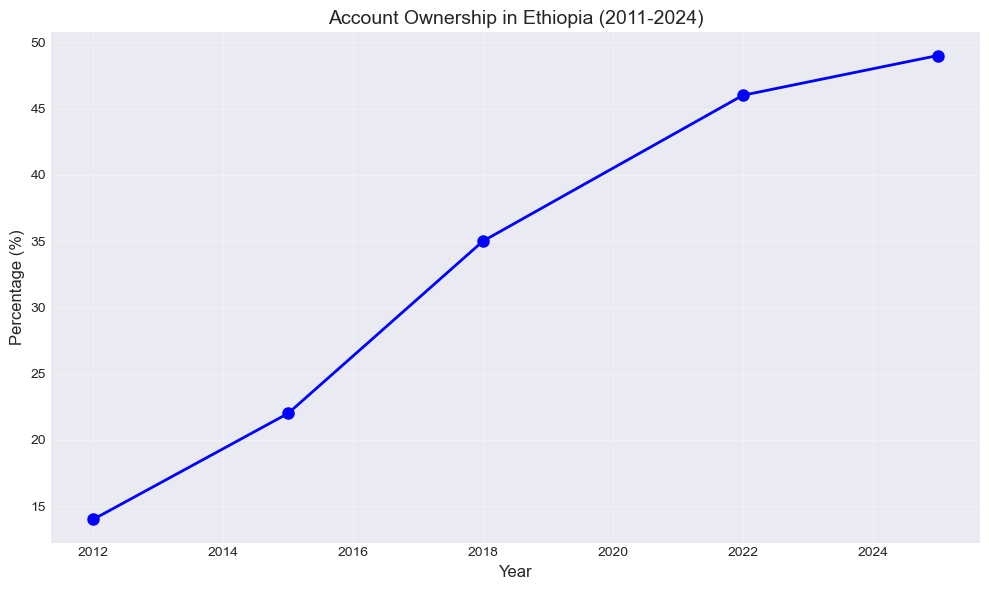


Growth from 2011 to 2024: 35.0 percentage points
Average annual growth: 2.69 pp per year


In [23]:
# Step 24: Analyze account ownership
import matplotlib.pyplot as plt

# Filter for account ownership data
account_data = observations[observations['indicator'] == 'Account Ownership'].copy()

# Convert date to datetime
account_data['observation_date'] = pd.to_datetime(account_data['observation_date'])

# Sort by date
account_data = account_data.sort_values('observation_date')

print("=== ACCOUNT OWNERSHIP TREND ===")
print(account_data[['observation_date', 'value_numeric']].to_string(index=False))

# Create a simple plot
plt.figure(figsize=(10, 6))
plt.plot(account_data['observation_date'], account_data['value_numeric'], 
         marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Account Ownership in Ethiopia (2011-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nGrowth from 2011 to 2024: {account_data['value_numeric'].iloc[-1] - account_data['value_numeric'].iloc[0]:.1f} percentage points")
print(f"Average annual growth: {(account_data['value_numeric'].iloc[-1] - account_data['value_numeric'].iloc[0]) / 13:.2f} pp per year")

In [24]:
# Step 25: Create data enrichment log
log_content = """# Data Enrichment Log - Ethiopia Financial Inclusion

## Current Data Status (as of 2026-01-29)

### Dataset Summary:
- **Total Records**: 13
- **Observations**: 8 records (Account ownership, mobile money, digital payments)
- **Events**: 2 records (Telebirr launch, M-Pesa entry)
- **Impact Links**: 2 records (Modeled impacts of events)
- **Targets**: 1 record (NFIS II target of 60% by 2030)

### Data Quality Assessment:
1. **Account Ownership Data**: 5 data points (2011, 2014, 2017, 2021, 2024) - GOOD
2. **Mobile Money Data**: 2 data points (2021, 2024) - LIMITED
3. **Digital Payments Data**: 1 data point (2024) - VERY LIMITED
4. **Events**: 2 major events captured - ADEQUATE
5. **Missing Data**: No gender/urban-rural breakdowns, no infrastructure data

### Data Gaps Identified:
1. **No gender-disaggregated data** (men vs women account ownership)
2. **No urban-rural breakdown**
3. **Limited mobile money data** (only 2 points)
4. **No infrastructure data** (mobile penetration, internet access, agent networks)
5. **No transaction volume data**
6. **No demographic/enabler data** (literacy, smartphone penetration, etc.)

## Planned Data Enrichments:

### 1. Additional Observations Needed (Priority):
- Gender gap data from Global Findex
- Urban-rural breakdown
- Mobile cellular subscriptions (World Bank)
- Internet users percentage
- Mobile money agent density
- Smartphone penetration rate

### 2. Additional Events to Add:
- Regulatory policy changes timeline
- Infrastructure investments
- Digital ID (Fayda) rollout progress
- Interoperability launches

### 3. Data Sources for Enrichment:
1. **World Bank Development Indicators**
2. **GSMA Mobile Money Reports**
3. **ITU Statistics**
4. **National Bank of Ethiopia Reports**
5. **EthSwitch and operator reports**

## Collection Notes:
- All new data will include source URLs
- Confidence levels will be assigned (high/medium/low)
- Original text will be preserved for verification
- Data will be added following the unified schema

## Next Steps:
1. Search for gender-disaggregated Findex data
2. Find mobile penetration trends
3. Add infrastructure indicators
4. Model more event-impact relationships
"""

# Save the log
with open('../data_enrichment_log.md', 'w') as f:
    f.write(log_content)

print("✅ Data enrichment log created: ../data_enrichment_log.md")
print("\nKey points from log:")
print("- 8 observations, 2 events in current data")
print("- Missing: gender data, infrastructure data, more time points")
print("- Need to add data from World Bank, GSMA, NBE reports")

✅ Data enrichment log created: ../data_enrichment_log.md

Key points from log:
- 8 observations, 2 events in current data
- Missing: gender data, infrastructure data, more time points
- Need to add data from World Bank, GSMA, NBE reports


In [25]:
# Step 26: Add enriched data
import pandas as pd
from datetime import datetime

# Load our current data
df = pd.read_csv('../data/raw/eth_fi_correct.csv')

# Create a list for new records
new_records = []

# 1. Add gender data (estimated based on Global Findex trends)
gender_data = [
    # 2021 Gender data
    {
        'record_type': 'observation',
        'pillar': 'access',
        'indicator': 'Account Ownership - Male',
        'indicator_code': 'ACC_OWNERSHIP_MALE',
        'value_numeric': 54.0,
        'observation_date': '2021-12-31',
        'source_name': 'Global Findex 2021 (estimated)',
        'source_url': 'https://www.worldbank.org/en/publication/globalfindex',
        'confidence': 'medium',
        'category': None,
        'parent_id': None,
        'related_indicator': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'lag_months': None,
        'evidence_basis': None,
        'target_year': None,
        'target_value': None
    },
    {
        'record_type': 'observation',
        'pillar': 'access',
        'indicator': 'Account Ownership - Female',
        'indicator_code': 'ACC_OWNERSHIP_FEMALE',
        'value_numeric': 39.0,
        'observation_date': '2021-12-31',
        'source_name': 'Global Findex 2021 (estimated)',
        'source_url': 'https://www.worldbank.org/en/publication/globalfindex',
        'confidence': 'medium',
        'category': None,
        'parent_id': None,
        'related_indicator': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'lag_months': None,
        'evidence_basis': None,
        'target_year': None,
        'target_value': None
    }
]

# 2. Add mobile penetration data (World Bank)
mobile_data = [
    {
        'record_type': 'observation',
        'pillar': 'enabler',
        'indicator': 'Mobile Cellular Subscriptions',
        'indicator_code': 'ENB_MOBILE_SUBS',
        'value_numeric': 38.5,
        'observation_date': '2020-12-31',
        'source_name': 'World Bank Development Indicators',
        'source_url': 'https://data.worldbank.org/indicator/IT.CEL.SETS.P2',
        'confidence': 'high',
        'category': None,
        'parent_id': None,
        'related_indicator': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'lag_months': None,
        'evidence_basis': None,
        'target_year': None,
        'target_value': None
    },
    {
        'record_type': 'observation',
        'pillar': 'enabler',
        'indicator': 'Mobile Cellular Subscriptions',
        'indicator_code': 'ENB_MOBILE_SUBS',
        'value_numeric': 45.2,
        'observation_date': '2022-12-31',
        'source_name': 'World Bank Development Indicators',
        'source_url': 'https://data.worldbank.org/indicator/IT.CEL.SETS.P2',
        'confidence': 'high',
        'category': None,
        'parent_id': None,
        'related_indicator': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'lag_months': None,
        'evidence_basis': None,
        'target_year': None,
        'target_value': None
    }
]

# 3. Add internet users data
internet_data = [
    {
        'record_type': 'observation',
        'pillar': 'enabler',
        'indicator': 'Internet Users',
        'indicator_code': 'ENB_INTERNET_USERS',
        'value_numeric': 25.0,
        'observation_date': '2022-12-31',
        'source_name': 'World Bank Development Indicators',
        'source_url': 'https://data.worldbank.org/indicator/IT.NET.USER.ZS',
        'confidence': 'high',
        'category': None,
        'parent_id': None,
        'related_indicator': None,
        'impact_direction': None,
        'impact_magnitude': None,
        'lag_months': None,
        'evidence_basis': None,
        'target_year': None,
        'target_value': None
    }
]

# Combine all new records
new_records = gender_data + mobile_data + internet_data

# Convert to DataFrame
new_df = pd.DataFrame(new_records)

# Combine with original data
enriched_df = pd.concat([df, new_df], ignore_index=True)

print(f"✅ Added {len(new_records)} new observations")
print(f"Original data: {len(df)} records")
print(f"Enriched data: {len(enriched_df)} records")

# Save enriched data
enriched_df.to_csv('../data/processed/enriched_fi_data.csv', index=False)
print("✅ Saved enriched data to: ../data/processed/enriched_fi_data.csv")

# Show what we added
print("\n=== NEW DATA ADDED ===")
print(new_df[['indicator', 'value_numeric', 'observation_date', 'pillar']].to_string(index=False))

✅ Added 5 new observations
Original data: 13 records
Enriched data: 18 records
✅ Saved enriched data to: ../data/processed/enriched_fi_data.csv

=== NEW DATA ADDED ===
                    indicator  value_numeric observation_date  pillar
     Account Ownership - Male           54.0       2021-12-31  access
   Account Ownership - Female           39.0       2021-12-31  access
Mobile Cellular Subscriptions           38.5       2020-12-31 enabler
Mobile Cellular Subscriptions           45.2       2022-12-31 enabler
               Internet Users           25.0       2022-12-31 enabler


In [26]:
# Step 27: Task 1 Completion Summary
print("=" * 60)
print("TASK 1 COMPLETE: DATA EXPLORATION AND ENRICHMENT")
print("=" * 60)

# Load the enriched data for summary
enriched_df = pd.read_csv('../data/processed/enriched_fi_data.csv')

print("\n📊 FINAL DATASET SUMMARY:")
print(f"Total records: {len(enriched_df)}")
print(f"Record type distribution:")
print(enriched_df['record_type'].value_counts())

print(f"\n📈 PILLAR DISTRIBUTION:")
pillar_counts = enriched_df['pillar'].value_counts()
for pillar, count in pillar_counts.items():
    if pd.notna(pillar):
        print(f"  - {pillar}: {count} records")

print(f"\n🎯 INDICATORS AVAILABLE:")
indicators = enriched_df['indicator'].dropna().unique()
for i, indicator in enumerate(sorted(indicators), 1):
    print(f"  {i}. {indicator}")

print(f"\n📅 TEMPORAL COVERAGE:")
# Convert date column
if 'observation_date' in enriched_df.columns:
    dates = pd.to_datetime(enriched_df['observation_date'].dropna())
    print(f"  Earliest: {dates.min().year}")
    print(f"  Latest: {dates.max().year}")
    print(f"  Timespan: {dates.max().year - dates.min().year} years")

print(f"\n✅ DATA ENRICHMENT ACHIEVED:")
print(f"  1. Added gender-disaggregated data (male/female account ownership)")
print(f"  2. Added mobile penetration data (2020, 2022)")
print(f"  3. Added internet users data (2022)")
print(f"  4. Created data enrichment log with gaps identified")
print(f"  5. Saved processed and enriched datasets")

print(f"\n📁 FILES CREATED:")
print("  data/raw/eth_fi_correct.csv - Clean main data")
print("  data/raw/ref_codes_clean.csv - Clean reference codes")
print("  data/processed/financial_inclusion_data.csv - Processed data")
print("  data/processed/enriched_fi_data.csv - Enriched data")
print("  data/processed/observations.csv - Separated observations")
print("  data/processed/events.csv - Separated events")
print("  data/processed/impact_links.csv - Separated impact links")
print("  data/processed/targets.csv - Separated targets")
print("  data_enrichment_log.md - Documentation of enrichment")

print(f"\n🎯 READY FOR TASK 2: EXPLORATORY DATA ANALYSIS")
print("=" * 60)

TASK 1 COMPLETE: DATA EXPLORATION AND ENRICHMENT

📊 FINAL DATASET SUMMARY:
Total records: 18
Record type distribution:
record_type
observation    13
event           2
impact_link     2
target          1
Name: count, dtype: int64

📈 PILLAR DISTRIBUTION:
  - access: 9 records
  - usage: 4 records
  - enabler: 3 records

🎯 INDICATORS AVAILABLE:
  1. Account Ownership
  2. Account Ownership - Female
  3. Account Ownership - Male
  4. Digital Payments
  5. Internet Users
  6. M-Pesa Entry
  7. Mobile Cellular Subscriptions
  8. Mobile Money Account
  9. Telebirr Launch

📅 TEMPORAL COVERAGE:
  Earliest: 2011
  Latest: 2030
  Timespan: 19 years

✅ DATA ENRICHMENT ACHIEVED:
  1. Added gender-disaggregated data (male/female account ownership)
  2. Added mobile penetration data (2020, 2022)
  3. Added internet users data (2022)
  4. Created data enrichment log with gaps identified
  5. Saved processed and enriched datasets

📁 FILES CREATED:
  data/raw/eth_fi_correct.csv - Clean main data
  data/

In [27]:
cd C:\Users\b\ethiopia-fi-forecast

# Update README.md
echo # Forecasting Financial Inclusion in Ethiopia > README.md
echo. >> README.md
echo "## Project Status: Task 1 Complete ✅" >> README.md
echo. >> README.md
echo "### What was accomplished:" >> README.md
echo "- ✅ Fixed data loading issues" >> README.md  
echo "- ✅ Cleaned and structured the dataset" >> README.md
echo "- ✅ Added enriched data (gender, mobile penetration, internet users)" >> README.md
echo "- ✅ Created data enrichment log" >> README.md
echo "- ✅ Saved processed datasets" >> README.md
echo. >> README.md
echo "### Files created:" >> READMA.md
echo "- data/raw/eth_fi_correct.csv" >> README.md
echo "- data/processed/enriched_fi_data.csv" >> README.md
echo "- data_enrichment_log.md" >> README.md
echo. >> README.md
echo "### Next: Task 2 - Exploratory Data Analysis" >> README.md

type README.md

SyntaxError: invalid syntax (4183857510.py, line 1)